In [3]:
pip install vk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import vk
#import webbrowser
from vk.session import requests
import json

In [5]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [1]:
import networkx as nx

In [6]:
import copy

In [ ]:
#https://oauth.vk.com/authorize?client_id=51445002&scope=friends&redirect_uri=https://oauth.vk.com/blank.html&display=page&response_type=token&revoke=1#
#https://oauth.vk.com/authorize?client_id=51445002&scope=messages&redirect_uri=https://oauth.vk.com/blank.html&display=page&response_type=token&revoke=1#

In [7]:
token = "08df9c4e08df9c4e08df9c4e590bcf6144008df08df9c4e6b9d251ac1eb712049096851"
version = 5.126
user_id = 113001678


In [8]:
def myfunction(datafunc, user_idfunc, framefunc):
  i = 0
  while count > i:
    main_id = user_idfunc
    id_friend = datafunc[i]['id'] 
    first_name = datafunc[i]['first_name']
    last_name =  datafunc[i]['last_name']
    new_row = {'main_id': main_id, 'id_friend': id_friend,'first_name': first_name, 'last_name': last_name}

    try:
      #Если срабатывают условия, то данные отбрасываются
    
      if datafunc[i]['deactivated'] == "banned":
        print("Сработало исключение - banned")
      
      if datafunc[i]['deactivated'] == "deleted":
        print("Сработало исключение - deleted")

    except:  
    
      try: 
        if datafunc[i]['is_closed'] == True:
          print("Доступ к странице пользователя недоступен")
          print(last_name)
        else:
          framefunc = framefunc.append(new_row, ignore_index=True)
          print(new_row)

      except:
        framefunc = framefunc.append(new_row, ignore_index=True)
        print(new_row)
    
    i += 1
  #frame1 = frame1.iloc[0:0]
  print(framefunc)
  return framefunc

In [ ]:
response = requests.get("https://api.vk.com/method/friends.get",
                        params={
                            "user_id": user_id,
                            "order": "name",
                            "count": 5000,
                            "offset": 0,
                            "fields": "nickname",

                            "access_token": token,
                            "v": version
                        }
                        )
data = response.json()
data

#изменение здесь
infoUser = {'main_id':[],'id_friend':[],'first_name':[],'last_name':[]}
#i = 0
frame1 = pd.DataFrame([infoUser])
frame1 = frame1.iloc[0:0]
data1 = data['response']['items']
count = data['response']['count']
frame1 = myfunction(data1, user_id, frame1)


In [ ]:
idFriendsUser = frame1['id_friend']
frame2 = copy.deepcopy(frame1)
i = 0
countOfidFriend = len(frame1['id_friend'])
while i < countOfidFriend:
  response = requests.get("https://api.vk.com/method/friends.get",
                        params={
                            "user_id": idFriendsUser[i],
                            "order": "name",
                            "count": 5000,
                            "offset": 0,
                            "fields": "nickname",

                            "access_token": token,
                            "v": version
                        }
                        )
  if(response.json()):
    data2 = response.json()
    print(idFriendsUser[i])
    print(data2)
    data3 = data2['response']['items']
    count = data2['response']['count']
    frame2 = myfunction(data3, idFriendsUser[i], frame2)
    del data2
    i += 1

frame2

In [ ]:
infoUser = {'id_firstNode':[],'id_secondNode':[],'CountOfCommonFriend':[]}
#i = 0
frame3 = pd.DataFrame([infoUser])
frame3 = frame3.iloc[0:0]

countOfMainID = len(frame2.main_id.unique())
i = 0
j = 0

current_firstNodeId  = frame2.main_id.unique() #Здесь хранятся id пользователей чьих друзей запишут в data1FriendFirstNode 

while countOfMainID > i:
  
  data1FriendFirstNode = frame2.loc[current_firstNodeId[i] == frame2.main_id, 'id_friend'].to_list()
  countOfFirstNodeId = len(data1FriendFirstNode)
  while countOfFirstNodeId > j:
    countOfCommonFriend = 0
    data2FriendSecondNode = frame2.loc[data1FriendFirstNode[j] == frame2.main_id, 'id_friend'].to_list() #Здесь хранятся id пользователей друзей, чтобы затем определить между ними общих
    current_SecondNodeId  = len(data2FriendSecondNode)
    sizedata1 = len(data1FriendFirstNode)
    sizedata2 = len(data2FriendSecondNode)
    for ix in range(sizedata1):
      for jx in range(sizedata2):
        if data1FriendFirstNode[ix] == data2FriendSecondNode[jx]:
          countOfCommonFriend += 1
          print()

    new_row = {'id_firstNode': current_firstNodeId[i], 'id_secondNode': data1FriendFirstNode[j],'CountOfCommonFriend': countOfCommonFriend}
    frame3 = frame3.append(new_row, ignore_index=True)
    j += 1
    
  i += 1
    
print(frame3)


In [14]:
frame4 = frame3.loc[frame3["CountOfCommonFriend"] > 0]

frame4 = frame4.drop_duplicates()
frame4

,id_firstNode,id_secondNode,CountOfCommonFriend
0,113001678,124652274,12
1,113001678,211137990,5
2,113001678,181948702,21
3,113001678,34008823,4
4,113001678,229491502,7
6,113001678,39262511,4
7,113001678,314194014,1
8,113001678,149073861,8
9,113001678,237842422,13
10,113001678,377465565,12


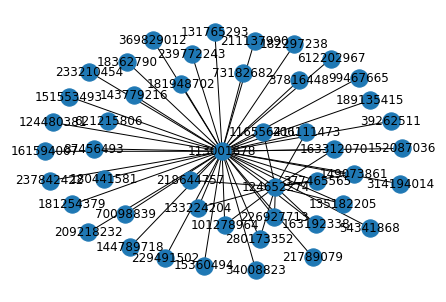

In [15]:


G = nx.Graph()
id_firstNode = frame4.id_firstNode.to_list()
id_secondNode = frame4.id_secondNode.to_list()


sizeOfNodes = len(frame4.CountOfCommonFriend)
for ix in range(sizeOfNodes):
  G.add_edge(id_firstNode[ix],id_secondNode[ix])
  G.edges()
nx.draw(G, with_labels=1)